In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
with tf.Session() as sess:
 fig, ax = plt.subplots()
 ax.plot(tf.random_normal([100]).eval(), tf.random_normal([100]).eval(),'o')
 ax.set_title('Sample random plot for TensorFlow')
plt.savefig("result.png")

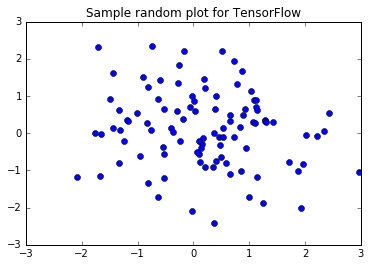

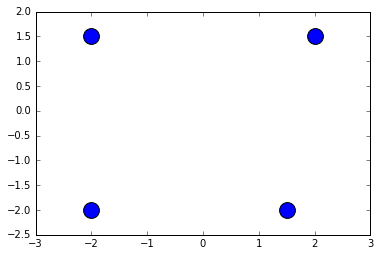

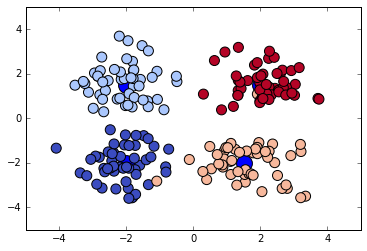

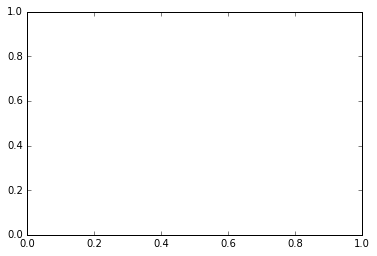

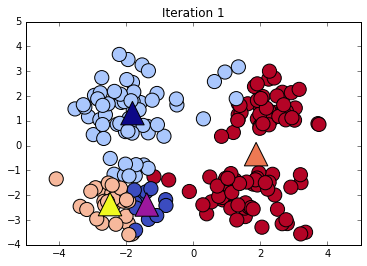

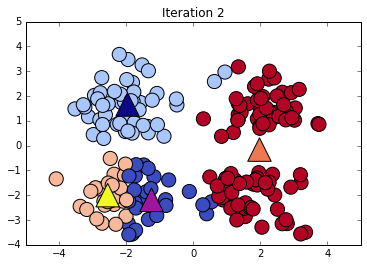

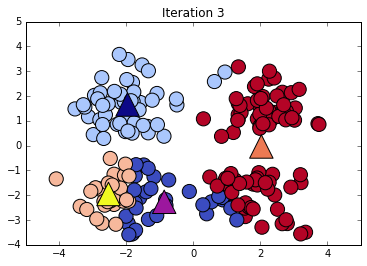

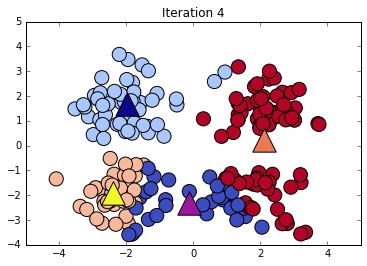

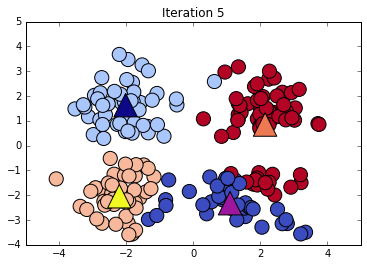

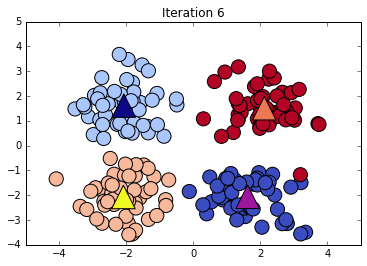

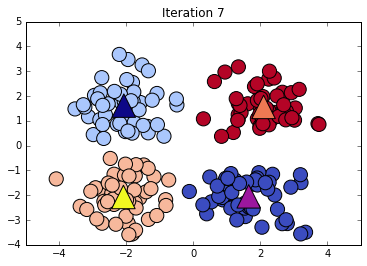

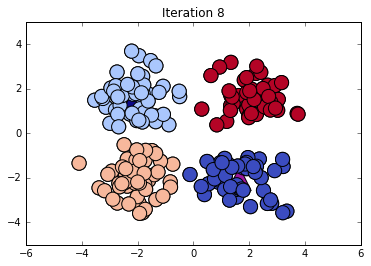

Found in 2.30 seconds
Centroids:
[[ 1.65289262 -2.04643427]
 [-2.0763623   1.61204964]
 [-2.08862822 -2.07255306]
 [ 2.09831502  1.55936014]]
Cluster assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [5]:
import tensorflow as tf
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
DATA_TYPE = 'blobs'
# Number of clusters, if we choose circles, only 2 will be enough
if (DATA_TYPE == 'circle'):
 K=2
else:
 K=4
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000
N = 200
start = time.time()
centers = [(-2, -2), (-2, 1.5), (1.5, -2), (2, 1.5)]
if (DATA_TYPE == 'circle'):
 data, features = make_circles(n_samples=200, shuffle=True, noise= 0.01,factor=0.4)
else:
 data, features = make_blobs (n_samples=200, centers=centers, n_features= 2, cluster_std=0.8, shuffle=False, random_state=42)
fig, ax = plt.subplots()
ax.scatter(np.asarray(centers).transpose()[0],np.asarray(centers).transpose()[1], marker = 'o', s = 250)
plt.show()
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
    ax.scatter(np.asarray(centers).transpose()[0],np.asarray(centers).transpose()[1], marker = 'o', s = 250)
    ax.scatter(data.transpose()[0], data.transpose()[1], marker = 'o', s = 100,c = features, cmap=plt.cm.coolwarm )
plt.plot()
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))
centroids = tf.Variable(tf.slice(points.initialized_value(), [0,0], [K,2]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids),reduction_indices=2)
best_centroids = tf.argmin(sum_squares, 1)
did_assignments_change = tf.reduce_any(tf.not_equal(best_centroids,cluster_assignments))
def bucket_mean(data, bucket_ids, num_buckets):
	total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
	count = tf.unsorted_segment_sum(tf.ones_like(data), bucket_ids,num_buckets)
	return total / count
means = bucket_mean(points, best_centroids, K)
with tf.control_dependencies([did_assignments_change]):
    do_updates = tf.group(centroids.assign(means),cluster_assignments.assign(best_centroids))
changed = True
iters = 0
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
	colourindexes=[2,1,4,3]
else:
	colourindexes=[2,1]
while changed and iters < MAX_ITERS:
		fig, ax = plt.subplots()
		iters += 1
		[changed, _] = sess.run([did_assignments_change, do_updates])
		[centers, assignments] = sess.run([centroids, cluster_assignments])
		ax.scatter(sess.run(points).transpose()[0],
		sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments,cmap=plt.cm.coolwarm )
		ax.scatter(centers[:,0],centers[:,1], marker = '^', s = 550, c =colourindexes, cmap=plt.cm.plasma)
		ax.set_title('Iteration ' + str(iters))
plt.savefig("kmeans" + str(iters) +".png")
ax.scatter(sess.run(points).transpose()[0],
sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments,
cmap=plt.cm.coolwarm )
plt.show()
end = time.time()
print ("Found in %.2f seconds" % (end-start)), iters, "iterations"
print ("Centroids:")
print (centers)
print ("Cluster assignments:", assignments)

[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]


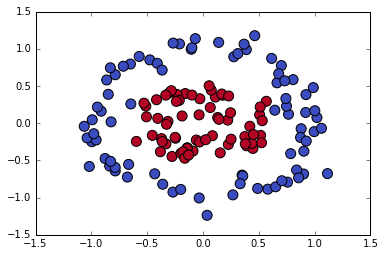

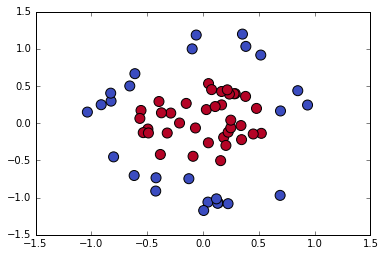

Found in 2.49 seconds
Cluster assignments: [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]


In [6]:
import tensorflow as tf
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_circles

N=210
K=2
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000
cut=int(N*0.7)

start = time.time()

data, features = make_circles(n_samples=N, shuffle=True, noise= 0.12, factor=0.4)
tr_data, tr_features= data[:cut], features[:cut]
te_data,te_features=data[cut:], features[cut:]

fig, ax = plt.subplots()
ax.scatter(tr_data.transpose()[0], tr_data.transpose()[1], marker = 'o', s = 100, c = tr_features, cmap=plt.cm.coolwarm )
plt.plot()

points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

test=[]

for i, j in zip(te_data, te_features):
    distances = tf.reduce_sum(tf.square(tf.subtract(i , tr_data)),axis=1)
    neighbor = tf.arg_min(distances,0)

    #print tr_features[sess.run(neighbor)]
    #print j
    test.append(tr_features[sess.run(neighbor)])
print (test)
fig, ax = plt.subplots()
ax.scatter(te_data.transpose()[0], te_data.transpose()[1], marker = 'o', s = 100, c = test, cmap=plt.cm.coolwarm )
plt.plot()
plt.show()

#rep_points_v = tf.reshape(points, [1, N, 2])
#rep_points_h = tf.reshape(points, [N, 2])
#sum_squares = tf.reduce_sum(tf.square(rep_points - rep_points), reduction_indices=2)
#print(sess.run(tf.square(rep_points_v - rep_points_h)))

end = time.time()
print ("Found in %.2f seconds" % (end-start))
print ("Cluster assignments:", test)